In [8]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [9]:
df_horror = pd.read_csv("../HorrorCleanedCookies.csv")
df_horror.head()

,Title,Author,Year,Rating,Raters
0,The Shining (Paperback),Stephen King,1977,4.26,1331732
1,It (Paperback),Stephen King,1986,4.25,979436
2,Dracula (Paperback),Bram Stoker,1897,4.01,1119957
3,Carrie (Mass Market Paperback),Stephen King,1974,3.98,630669
4,Pet Sematary (Kindle Edition),Stephen King,1983,4.04,516341


In [10]:
minRaters=min(df_horror.Raters)
maxRaters=max(df_horror.Raters)
meanRaters=df_horror.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 266
Max Raters : 5922520
Mean Raters : 76444.321857486


In [11]:
#rating class column
conditions  = [ df_horror.Rating >= 3.5, (df_horror.Rating < 3.5) & (df_horror.Rating> 2), (df_horror.Rating <= 2) ]
choices     = [ "good", 'mediocre', 'bad' ]
df_horror["rating_class"] = np.select(conditions, choices, default="bad")
#rater class column
conditions  = [ df_horror.Raters >= 25000, (df_horror.Raters < 25000) & (df_horror.Raters> 1000), (df_horror.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_horror["raters_class"] = np.select(conditions, choices, default="small")

df_horror['worth_reading']=np.where(((df_horror.rating_class == "mediocre") & (df_horror.raters_class == "large"))|((df_horror.rating_class == "good") & ((df_horror['raters_class'] == "large")|(df_horror["raters_class"] =="medium"))) ,'yes','no')

In [12]:
df_horror.head()

,Title,Author,Year,Rating,Raters,rating_class,raters_class,worth_reading
0,The Shining (Paperback),Stephen King,1977,4.26,1331732,good,large,yes
1,It (Paperback),Stephen King,1986,4.25,979436,good,large,yes
2,Dracula (Paperback),Bram Stoker,1897,4.01,1119957,good,large,yes
3,Carrie (Mass Market Paperback),Stephen King,1974,3.98,630669,good,large,yes
4,Pet Sematary (Kindle Edition),Stephen King,1983,4.04,516341,good,large,yes


In [13]:
#split dataset in features and target variable
feature_cols=['Rating','rating_class','raters_class', "Raters"]
X = df_horror[feature_cols] # Features
y = df_horror['worth_reading'] # Target variable

print(X)
print(y)

      Rating rating_class raters_class   Raters
0       4.26         good        large  1331732
1       4.25         good        large   979436
2       4.01         good        large  1119957
3       3.98         good        large   630669
4       4.04         good        large   516341
...      ...          ...          ...      ...
1244    3.40     mediocre        large    59940
1245    3.47     mediocre       medium     2136
1246    3.64         good       medium     7614
1247    3.45     mediocre       medium     3671
1248    4.10         good        large    67023

[1249 rows x 4 columns]
0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1244    yes
1245     no
1246    yes
1247     no
1248    yes
Name: worth_reading, Length: 1249, dtype: object


In [14]:
X=pd.get_dummies(X)
X

,Rating,Raters,rating_class_good,rating_class_mediocre,raters_class_large,raters_class_medium,raters_class_small
0,4.26,1331732,1,0,1,0,0
1,4.25,979436,1,0,1,0,0
2,4.01,1119957,1,0,1,0,0
3,3.98,630669,1,0,1,0,0
4,4.04,516341,1,0,1,0,0
...,...,...,...,...,...,...,...
1244,3.40,59940,0,1,1,0,0
1245,3.47,2136,0,1,0,1,0
1246,3.64,7614,1,0,0,1,0
1247,3.45,3671,0,1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', n_estimators=50, random_state=42)

In [16]:
predictions = rf_model.predict(X_test)
predictions

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 

In [20]:
rf_model.feature_importances_

array([0.43968477, 0.06512471, 0.27281659, 0.14255365, 0.0241897 ,
       0.03166908, 0.02396151])

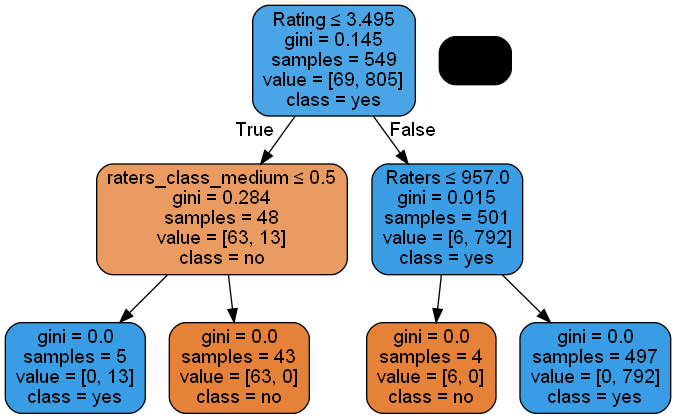

In [23]:
estimator = rf_model.estimators_[5]

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('read_horror_rf.png')
Image(graph.create_png())